In [11]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import scipy.special as sp
import pandas as pd

#Custome graph format style sheet
plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = False
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.png'
if not 'location' in locals():
    #save location.  First one is for running on home PC, second for running on the work laptop.  May need to make a global change
    #location = 'E:\\Documents\\Dan\\Code\\Prospectus\\Document\\Figures\\'
    #location = 'C:\\Users\\dhendrickson\\Documents\\github\\FigsAndPlots\\FigsAndPlotsDocument\\Figures\\'
    location = 'E:\\Documents\\Dan\\Phd\\Play\\'

#Standard cycle for collors and line styles
default_cycler = (cycler('color', ['0.00', '0.40', '0.60', '0.70']) + cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=default_cycler)
my_cmap = plt.get_cmap('gray')

In [12]:
#Extra Headers:
import os as os
import statistics as st
import os as os
import pandas as pd
import random
import multiprocessing
from joblib import Parallel, delayed
import time


In [13]:
#Columns names for a file with all 6 dimmensions
Header = np.array(['T', 'X1','Y1','Z1','X2','Y2','Z2'])

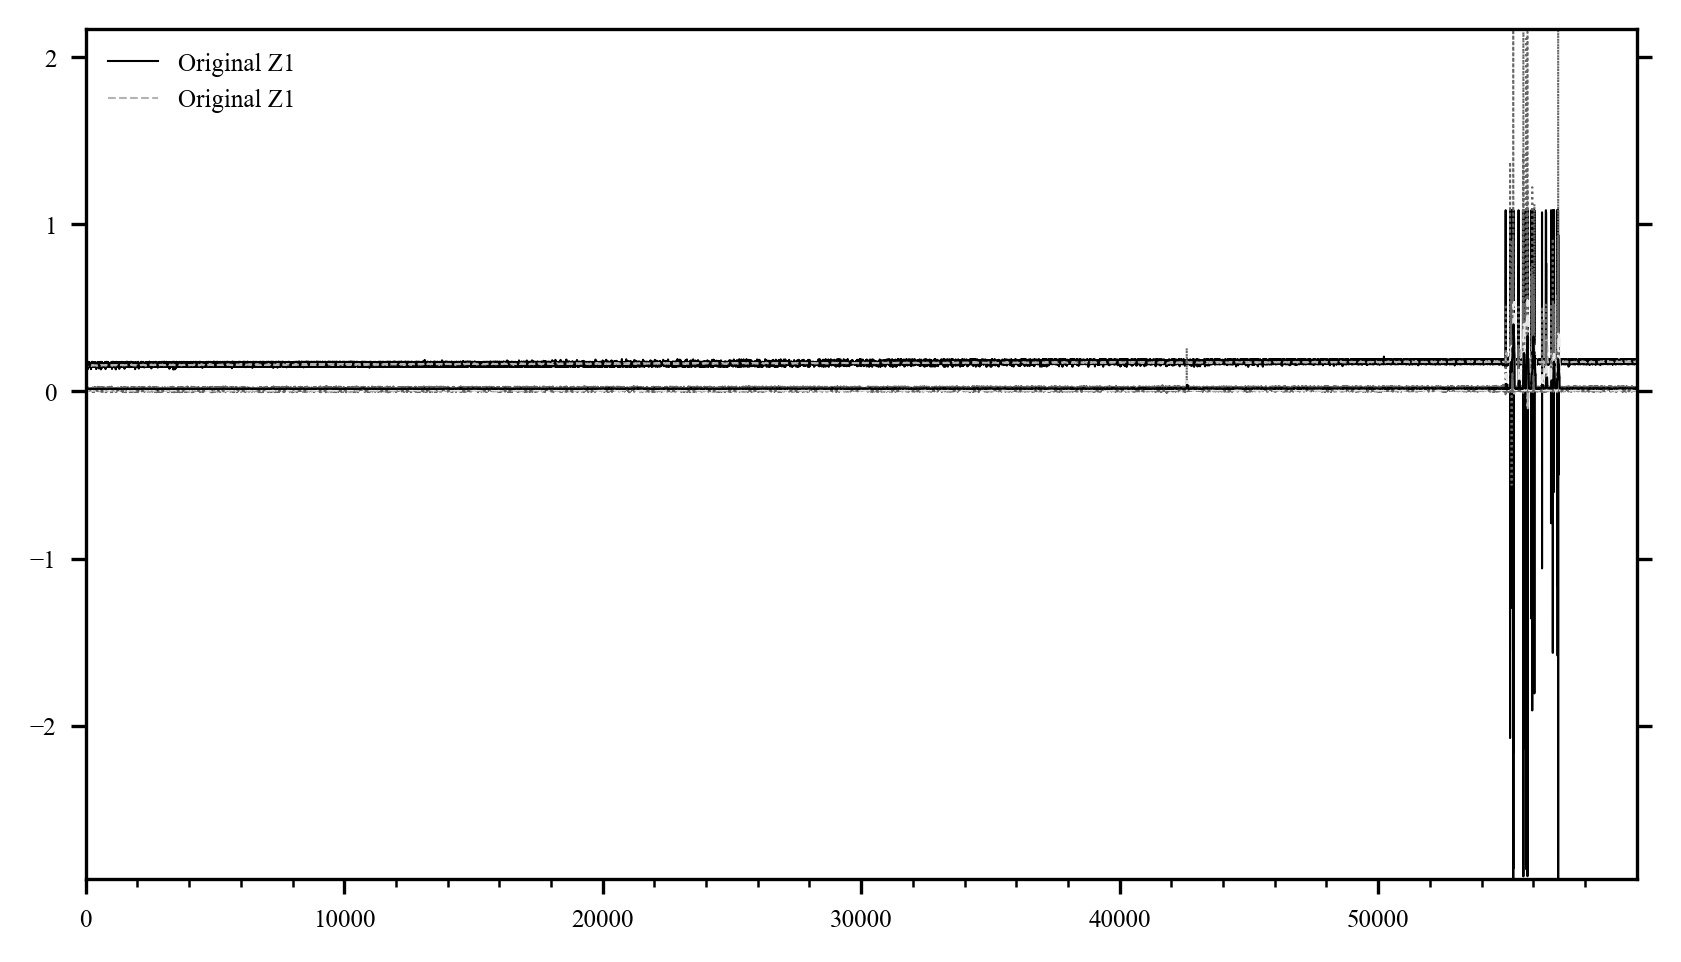

In [14]:
# Directory = './Data'
Directory = 'C:\\Users\\Dan\\Desktop\\Temp\\'
#Directory = 'C:\\Users\\dhendrickson\\Desktop\\AccelData\\home\\pi\\AccelData\\'
files = os.listdir(Directory)

#files = random.sample(files,2)

Reorder_cycler = (cycler('color', ['0.00', '0.70', '0.40', '0.90']) + cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=Reorder_cycler)

start = 0
end = 800000

#start = 54000
#end = 56000

size = 5000
Arange = 50
coord = 2

Saving = True
location = Directory
Titles = False

for Filename in files:
    if Filename[-4:] ==  '.csv':
        ODataSet = np.genfromtxt(open(Directory+'/'+Filename,'r'), delimiter=',',skip_header=0)
        #ODataSet = ODataSet[:,1:5]
        length = np.shape(ODataSet)[0]

        SmoothRDataSet = np.zeros(np.shape(ODataSet)[0])
        SmoothXDataSet = np.zeros(np.shape(ODataSet)[0])
        TdDataSet = np.zeros(np.shape(ODataSet)[0])

        results =[]

        fig=plt.figure(figsize=(6.67,3.75))


        #for i in range(int(length/size)):
        for i in range(1):
            StdDev = np.zeros(length)
            StdDevSmooth = np.zeros(length)
            coord = i+3
            
            SmoothRDataSet[0] = 0
            SmoothXDataSet[0] = 0
            StdDev[0]=0
            StdDevSmooth[0]=0

            factor = np.average(np.power(np.power(ODataSet[:,1],2)+np.power(ODataSet[:,2],2),0.5))

            TdDataSet[0] = np.sqrt(ODataSet[0,1]**2+ODataSet[0,2]**2)-factor
            TdDataSet[1] = np.sqrt(ODataSet[1,1]**2+ODataSet[1,2]**2)-factor
            for j in range(Arange-1):
                k = j+2
                TdDataSet[k] = np.sqrt(ODataSet[k,1]**2+ODataSet[k,2]**2+ODataSet[k,3]**2)-factor
            for j in range(length-Arange):
                k = (length-1)-j
                TdDataSet[k] = np.sqrt(ODataSet[k,1]**2+ODataSet[k,2]**2+ODataSet[k,3]**2)-factor
            for j in range(Arange-1):
                k = j+2
                SmoothXDataSet[k] = np.average(ODataSet[0:k,coord])
                #StdDev[k]=st.stdev(ODataSet[0:k,coord])
                StdDevSmooth[k] = st.stdev(TdDataSet[0:k])
                SmoothRDataSet[k] = np.average(TdDataSet[0:k])
            for j in range(length-Arange):
                k = (length-1)-j
                SmoothXDataSet[k] = np.average(ODataSet[k-Arange:k,coord])
                #StdDev[k]=st.stdev(ODataSet[k-Arange:k,coord])
                StdDevSmooth[k]=st.stdev(TdDataSet[k-Arange:k])
                SmoothRDataSet[k] = np.average(TdDataSet[k-Arange:k])
            
            plt.plot(ODataSet[start:end,coord], label = 'Original ' + Header[coord])
            plt.plot(SmoothXDataSet[start:end], label = 'Original ' + Header[coord])
            plt.plot(TdDataSet[start:end]) #, label = 'Smoothed Signal')
            plt.plot(StdDevSmooth[start:end]) #,label = 'StdDev of signal')
            plt.plot(SmoothRDataSet[start:end]) #, label = 'Smoothed Signal')
            
            
            
            #plt.show()
            #print(title,max(StdDev),max(SmoothXDataSet[start:end]))
        
        title = Filename #+ ' ' + Header[coord]
        if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "")+FFormat)
        
        if Ledgends: plt.legend()
        if Titles: plt.title(title)
        
        plt.show()
        
        #results.append([np.average(DataSet[:,1][i*size:(i+1)*size]), np.average(DataSet[:,2][i*size:(i+1)*size]),np.average(DataSet[:,3][i*size:(i+1)*size])])

        #results = np.matrix(results)
        #df = pd.DataFrame(data=results.astype('float'))
        #df.to_csv('C:\\Users\\dhendrickson\\Desktop\\Phone Acceleration\\Gyro-output-' + Filename[10:20] + '.csv', sep=',', header=False, float_format='%.8f')
        #PlotFingerPrint(DataSet[:,coord][start:end],'a',title,'coif1')

Saving = False
Titles = True